### TEST AVEC PLUSIEURS IMAGES

In [1]:
# Import des modules
import os
import random
import numpy as np
import skimage as ski
import matplotlib.pyplot as plt
import scipy as scp
from scipy import ndimage
from scipy.stats import norm
from skimage.color import rgb2gray
from skimage.transform import resize

In [2]:
# Bloc de fonctions utiles 

# Importer une image
def import_image(filename):
    image = ski.io.imread(filename)
    return np.array(image)

# Afficher une image en couleur
def display_image(image,title):
    plt.figure()
    plt.imshow(image, cmap='gray')
    #plt.title(title)
    plt.axis('off')
    plt.show()

def psnr(original_image, processed_image):
    original_image = original_image.astype(np.float64)
    processed_image = processed_image.astype(np.float64)
    mse = np.mean((original_image - processed_image) ** 2)
    if mse == 0:
        return float('inf')
    max_pixel = 255.0
    psnr_value = 10 * np.log10((max_pixel ** 2) / mse)
    return psnr_value


In [3]:
# Fonction de débruitage basée sur la densité de probabilité
def denoise_with_probability_density(image, sigma):
    # print("Beginning denoising with probability density...")
    # Création d'une image de sortie
    denoised_image = np.zeros(image.shape, dtype=np.float64)
    
    # Parcourir chaque pixel
    for i in range(1, image.shape[0] - 1):
        for j in range(1, image.shape[1] - 1):
            # Extraire la région locale (voisinage 3x3 autour du pixel)
            local_patch = image[i-1:i+2, j-1:j+2]
            
            # Calculer la moyenne et la variance de cette région
            local_mean = np.mean(local_patch)
            
            # Estimer la probabilité de chaque pixel en fonction de la distribution normale
            probability_density = norm.pdf(local_patch, loc=local_mean, scale=sigma)
            
            # Appliquer un filtre en pondérant par la densité de probabilité
            weighted_sum = np.sum(local_patch * probability_density)
            normalization_factor = np.sum(probability_density)
            denoised_pixel = weighted_sum / normalization_factor
            
            # Attribuer la valeur débruitée au pixel central
            denoised_image[i, j] = denoised_pixel

    # print("Denoising with probability density done.")
    # Convertir l'image débruitée en uint8
    return np.clip(denoised_image, 0, 255).astype(np.uint8)

##### TEST AVEC DES IMAGES EN NIVEAU DE GRIS

In [4]:
# Importer et traiter une image
def import_image_gray(filename, target_size=(512, 512)):
    image = ski.io.imread(filename)
    
    # Redimensionner l'image
    image = resize(image, target_size, anti_aliasing=True)
    print(f"Image {filename} importée avec forme: {image.shape}")
    
    # Si l'image est en couleur (3 canaux), la convertir en niveaux de gris
    if image.ndim == 3 and image.shape[2] == 3:  
        image = rgb2gray(image)  
        print(f"Image convertie en niveaux de gris: {image.shape}")
    
    # Si l'image a 2 canaux (par exemple, alpha et RGB en 2D), on la transforme en un seul canal
    if image.ndim == 3 and image.shape[2] == 2:
        image = image[:, :, 0]
        print(f"Image avec 2 canaux convertie en niveaux de gris: {image.shape}")
        
    return np.array(image)

In [5]:
def get_images():
    images = []
    path = '../img_test/gris/pgm'
    for filename in os.listdir(path):
        if filename.endswith('.pgm'):
            #print(f"Lecture du fichier: {filename}")
            image = import_image_gray(os.path.join(path, filename))
            if image is not None:
                #print(f"Forme de l'image après redimensionnement: {image.shape}")
                images.append(image)
    return np.array(images)

images = get_images()
print(images.shape)

Image ../img_test/gris/pgm\airplaneU2.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\boats.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\bridge.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\cameraman.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\clown.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\couple.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\crowd.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\girlface.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\houses.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\man.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\tank.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\tank2.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\truck.pgm importée avec forme: (512, 512)
Image ../img_test/gris/pgm\trucks.pgm importée avec forme: (512, 512)
Image ../img_test/gri

In [6]:
# Fonction pour ajouter du bruit à une image

# Bruit sel et poivre
def noise_salt_pepper(image, amount=0.05):
    image_noised = ski.util.random_noise(image, mode='s&p', amount=amount) * 255
    return image_noised.astype(np.uint8)

# Bruit gaussien
def noise_gaussian(image, var=0.01):
    image_noised = ski.util.random_noise(image, mode='gaussian', var=var) * 255
    return image_noised.astype(np.uint8)
 

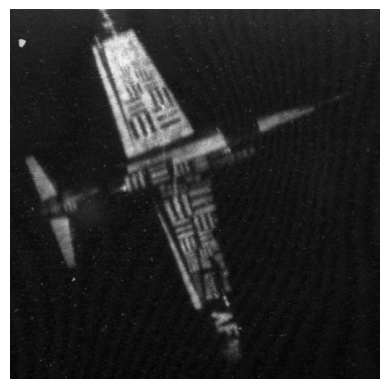

In [7]:
test_image = images[0]
display_image(test_image, 'Test image')

In [8]:
# Créer un tableau d'images bruitées

def get_noisy_image_salt_pepper(images):
    noisy_images = []
    for image in images:
        noisy_image = noise_salt_pepper(image)
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

def get_noisy_image_gaussian(images):
    noisy_images = []
    for image in images:
        noisy_image = noise_gaussian(image)
        noisy_images.append(noisy_image)
    return np.array(noisy_images)

noisy_images_salt_pepper = get_noisy_image_salt_pepper(images)
noisy_images_gaussian = get_noisy_image_gaussian(images)

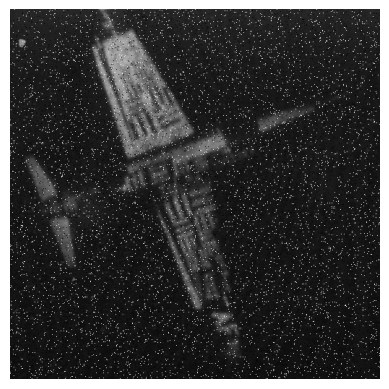

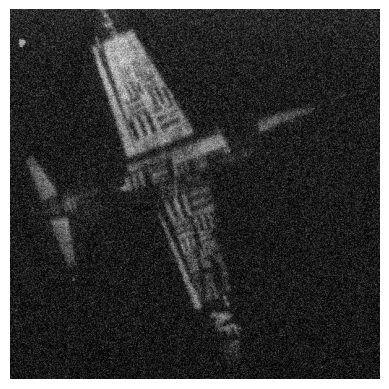

In [9]:
test_image_noisy_salt_pepper = noisy_images_salt_pepper[0]
test_image_noisy_gaussian = noisy_images_gaussian[0]
display_image(test_image_noisy_salt_pepper, 'Test image bruitée sel et poivre')
display_image(test_image_noisy_gaussian, 'Test image bruitée gaussien')

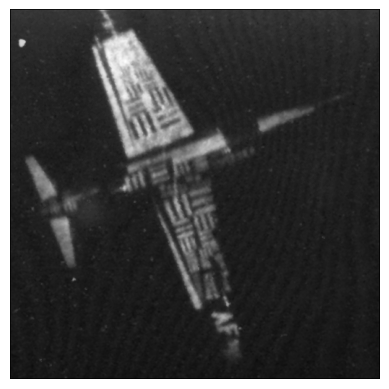

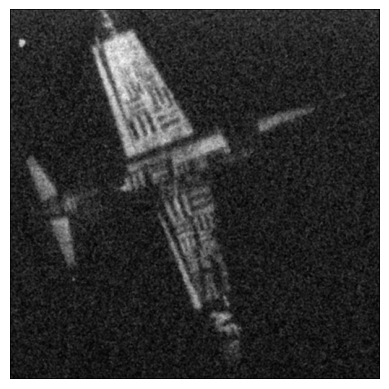

PSNR pour le bruit sel et poivre: 16.14160843005932
PSNR pour le bruit gaussien: 15.86995728420289


In [10]:
# Test debruitage
image_denoised_salt_pepper = denoise_with_probability_density(test_image_noisy_salt_pepper, 20)
image_denoised_gaussian = denoise_with_probability_density(test_image_noisy_gaussian, 20)

display_image(image_denoised_salt_pepper, 'Test image débruitée sel et poivre')
display_image(image_denoised_gaussian, 'Test image débruitée gaussien')

# Calcul du PSNR
psnr_salt_pepper = psnr(test_image, image_denoised_salt_pepper)
psnr_gaussian = psnr(test_image, image_denoised_gaussian)
print(f"PSNR pour le bruit sel et poivre: {psnr_salt_pepper}")
print(f"PSNR pour le bruit gaussien: {psnr_gaussian}")


In [11]:
# Afficage d'une courbe moyenne du psnr de l'image débruitée et de l'image originale des images pour le bruit sel et poivre (résultats érronés)

def image_denoising(images, noisy_images, sigma):
    denoised_images = []
    psnr_values = []
    for i in range(len(images)):
        image = images[i]
        noisy_image = noisy_images[i]
        denoised_image = denoise_with_probability_density(noisy_image, sigma)
        denoised_images.append(denoised_image)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    return np.array(denoised_images), np.array(psnr_values)

def display_curb_psnr(psnr_means, title):
    plt.figure()
    plt.plot(psnr_means)
    plt.title(title)
    plt.xlabel('Taille du sigma')
    plt.ylabel('PSNR en dB')
    plt.show()

In [12]:
# # Courbe moyenne psnr pour sel et poivre
# psnr_values_salt_pepper = []
# for i in range(5, 50, 5):
#     #print(i)
#     denoised_images, psnr_values = image_denoising(images, noisy_images_salt_pepper, i)
#     psnr_values_salt_pepper.append(np.mean(psnr_values))

# psnr_values_salt_pepper = np.array(psnr_values_salt_pepper)
# display_curb_psnr(psnr_values_salt_pepper, 'Courbe moyenne PSNR pour le bruit sel et poivre')

In [13]:
# # Courbe moyenne psnr pour gaussien
# psnr_values_gaussian = []
# for i in range(5, 50, 5):
#     denoised_images, psnr_values = image_denoising(images, noisy_images_gaussian, i)
#     psnr_values_gaussian.append(np.mean(psnr_values))

# psnr_values_gaussian = np.array(psnr_values_gaussian)
# display_curb_psnr(psnr_values_gaussian, 'Courbe moyenne PSNR pour le bruit gaussien')

In [14]:
# Affichage de la courbe de PSNR pour le bruit gaussien en fonction du sigma (pour UNE image)
def display_psnr_curve_gaussian(image, noisy_image, title):
    psnr_values = []
    sigmas = np.arange(0.1, 100, 1)
    for sigma in sigmas:
        denoised_image = denoise_with_probability_density(noisy_image, sigma)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    plt.figure()
    plt.plot(sigmas, psnr_values)
    plt.title(title)
    plt.xlabel('Sigma')
    plt.ylabel('PSNR en dB')
    plt.show()

In [15]:
# Affichage de la courbe de PSNR pour le bruit sel et poivre en fonction du sigma (pour UNE image)
def display_psnr_curve_salt_pepper(image, noisy_image, title):
    psnr_values = []
    sigmas = np.arange(0.1, 100, 1)
    for sigma in sigmas:
        denoised_image = denoise_with_probability_density(noisy_image, sigma)
        psnr_value = psnr(image, denoised_image)
        psnr_values.append(psnr_value)
    plt.figure()
    plt.plot(sigmas, psnr_values)
    plt.title(title)
    plt.xlabel('Sigma')
    plt.ylabel('PSNR en dB')
    plt.show()

In [16]:
image_test_1 = images[0]
noisy_image_test_1_gaussian = noisy_images_gaussian[0]
noisy_image_test_1_salt_pepper = noisy_images_salt_pepper[0]

C:\Users\Adam\AppData\Local\Temp\ipykernel_32732\129104837.py:22: RuntimeWarning: invalid value encountered in scalar divide
  denoised_pixel = weighted_sum / normalization_factor
C:\Users\Adam\AppData\Local\Temp\ipykernel_32732\129104837.py:29: RuntimeWarning: invalid value encountered in cast
  return np.clip(denoised_image, 0, 255).astype(np.uint8)


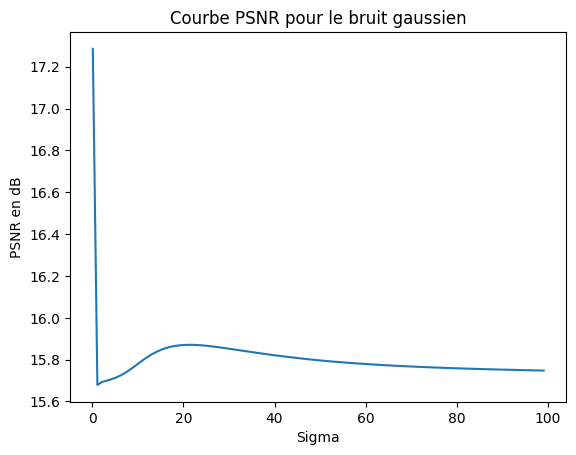

In [17]:
display_psnr_curve_gaussian(image_test_1, noisy_image_test_1_gaussian, 'Courbe PSNR pour le bruit gaussien')

C:\Users\Adam\AppData\Local\Temp\ipykernel_32732\129104837.py:22: RuntimeWarning: invalid value encountered in scalar divide
  denoised_pixel = weighted_sum / normalization_factor
C:\Users\Adam\AppData\Local\Temp\ipykernel_32732\129104837.py:29: RuntimeWarning: invalid value encountered in cast
  return np.clip(denoised_image, 0, 255).astype(np.uint8)


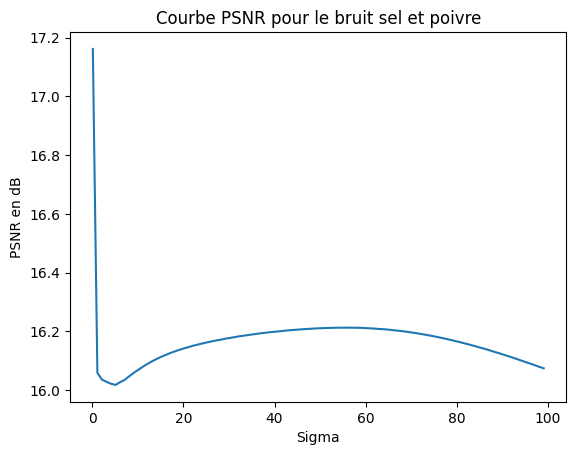

In [18]:
display_psnr_curve_salt_pepper(image_test_1, noisy_image_test_1_salt_pepper, 'Courbe PSNR pour le bruit sel et poivre')